<h2 style="color: #2e6c80;">Multiple Linear Regression</h2>
<p style="font-size: 14px;">
Multiple Linear Regression (MLR) is an extension of simple linear regression that allows us to model the relationship between a dependent variable and multiple independent variables. This powerful statistical technique is widely used in various fields such as finance, economics, medicine, and social sciences for predictive analysis and understanding the influence of multiple factors on an outcome.
</p>
<p style="font-size: 14px;">
<strong>Key Features:</strong>
<ul style="font-size: 14px;">
    <li><strong>Modeling Multiple Variables:</strong> MLR can simultaneously evaluate the effect of two or more independent variables on a single dependent variable, providing a comprehensive understanding of the data.</li>
    <li><strong>Equation:</strong> The MLR model can be represented by the equation:
        <br><code style="background-color: #f9f2f4; padding: 2px 4px; border-radius: 3px;">Y = β<sub>0</sub> + β<sub>1</sub>X<sub>1</sub> + β<sub>2</sub>X<sub>2</sub> + ... + β<sub>n</sub>X<sub>n</sub> + ε</code>
        <br>Where:
        <ul style="font-size: 14px;">
            <li><code>Y</code> is the dependent variable.</li>
            <li><code>X<sub>1</sub>, X<sub>2</sub>, ..., X<sub>n</sub></code> are the independent variables.</li>
            <li><code>β<sub>0</sub></code> is the intercept.</li>
            <li><code>β<sub>1</sub>, β<sub>2</sub>, ..., β<sub>n</sub></code> are the coefficients of the independent variables.</li>
            <li><code>ε</code> is the error term.</li>
        </ul>
    </li>
    <li><strong>Interpretation:</strong> The coefficients (β) represent the average change in the dependent variable for a one-unit change in the corresponding independent variable, assuming other variables remain constant.</li>
    <li><strong>Assumptions:</strong> MLR relies on certain assumptions, including linearity, independence of errors, homoscedasticity (constant variance of errors), and normality of error distribution.</li>
    <li><strong>Applications:</strong> MLR is used for forecasting, risk assessment, resource allocation, and decision-making, providing actionable insights and aiding strategic planning.</li>
</ul>
</p>
<p style="font-size: 14px;">
<strong>Advantages:</strong>
<ul style="font-size: 14px;">
    <li>Handles multiple predictors, allowing for complex modeling.</li>
    <li>Provides clear insights into the relationship between variables.</li>
    <li>Helps in identifying significant predictors for the dependent variable.</li>
</ul>
</p>
<p style="font-size: 14px;">
<strong>Limitations:</strong>
<ul style="font-size: 14px;">
    <li>Sensitive to outliers, which can significantly affect the model.</li>
    <li>Multicollinearity among independent variables can distort the results.</li>
    <li>Assumes a linear relationship, which may not always hold true.</li>
</ul>
</p>
<p style="font-size: 14px;">
In the following sections, we will explore how to implement Multiple Linear Regression using our dataset, evaluate the model's performance, and interpret the results to gain meaningful insights.
</p>


# Import laibrary

In [1]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# import sklearn 
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Load Dataset

In [2]:
data=pd.read_csv('Real estate.csv')

In [3]:
data.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [4]:
data.shape

(414, 8)

# Exploratory Data Analysis (EDA)

In [28]:
# To check null values in the dataset
data.isnull().sum()

No                                        0
X1 transaction date                       0
X2 house age                              0
X3 distance to the nearest MRT station    0
X4 number of convenience stores           0
X5 latitude                               0
X6 longitude                              0
Y house price of unit area                0
dtype: int64

In [30]:
#check for duplicate values
data.duplicated().sum()

0

In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 8 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   No                                      414 non-null    int64  
 1   X1 transaction date                     414 non-null    float64
 2   X2 house age                            414 non-null    float64
 3   X3 distance to the nearest MRT station  414 non-null    float64
 4   X4 number of convenience stores         414 non-null    int64  
 5   X5 latitude                             414 non-null    float64
 6   X6 longitude                            414 non-null    float64
 7   Y house price of unit area              414 non-null    float64
dtypes: float64(6), int64(2)
memory usage: 26.0 KB


In [50]:
corr_matrix = data.corr()
corr_matrix

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
No,1.000000,-0.048658,-0.032808,-0.013573,-0.012699,-0.010110,-0.011059,-0.028587
X1 transaction date,-0.048658,1.000000,0.017549,0.060880,0.009635,0.035058,-0.041082,0.087491
X2 house age,-0.032808,0.017549,1.000000,0.025622,0.049593,0.054420,-0.048520,-0.210567
X3 distance to the nearest MRT station,-0.013573,0.060880,0.025622,1.000000,-0.602519,-0.591067,-0.806317,-0.673613
X4 number of convenience stores,-0.012699,0.009635,0.049593,-0.602519,1.000000,0.444143,0.449099,0.571005
X5 latitude,-0.010110,0.035058,0.054420,-0.591067,0.444143,1.000000,0.412924,0.546307
X6 longitude,-0.011059,-0.041082,-0.048520,-0.806317,0.449099,0.412924,1.000000,0.523287
Y house price of unit area,-0.028587,0.087491,-0.210567,-0.673613,0.571005,0.546307,0.523287,1.000000


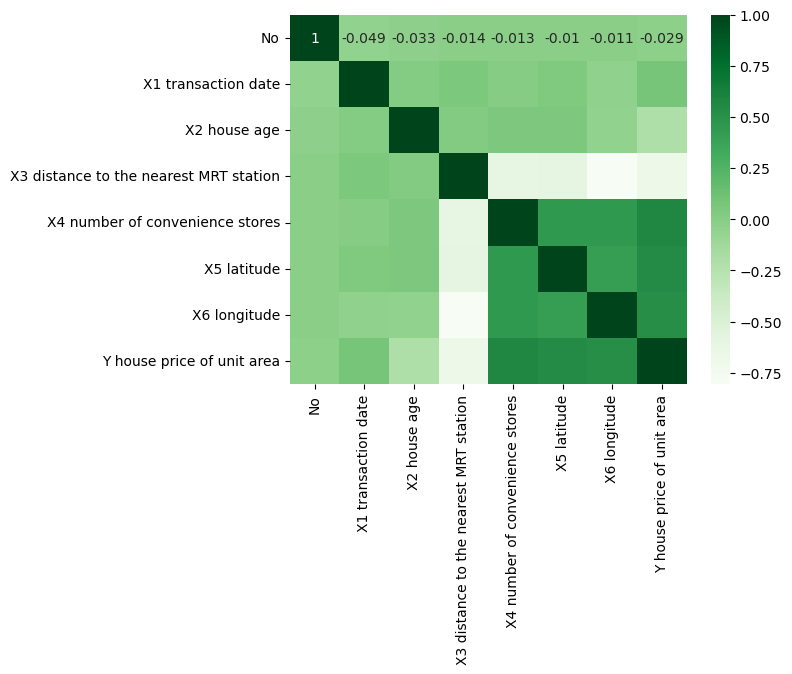

In [53]:
sns.heatmap(corr_matrix,cmap='Greens',annot=True)
plt.show()

In [34]:
import warnings
warnings.filterwarnings('ignore')

In [35]:
# sns.pairplot(data)
To plot pair plot you can use this line of code 

## Seperation Of Dependent And Independent Columns

In [37]:
x=data.drop('Y house price of unit area', axis=1)
y=data['X4 number of convenience stores']

# Train Test Spliting of data

In [39]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=101)

In [40]:
X_train.shape

(289, 7)

In [41]:
X_test.shape

(125, 7)

# Fit Data To the Model

In [42]:
model=LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [15]:
model.coef_

array([-1.26803420e-17, -5.07334605e-15, -5.99955923e-17,  7.07810166e-18,
        1.00000000e+00,  1.09793322e-15, -1.38744293e-15])

In [16]:
model.intercept_

1.035349583844436e-11

In [17]:
pd.DataFrame(model.coef_, x.columns, columns=['Coeficients'])

,Coeficients
No,-1.268034e-17
X1 transaction date,-5.073346e-15
X2 house age,-5.999559e-17
X3 distance to the nearest MRT station,7.078102e-18
X4 number of convenience stores,1.000000e+00
X5 latitude,1.097933e-15
X6 longitude,-1.387443e-15


 # Predictions from our Model

In [18]:
y_pred=model.predict(X_test)


In [54]:
# Create a new DataFrame with actual and predicted values
results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

print(results)

     Actual     Predicted
176       0  2.981729e-14
347       1  1.000000e+00
307       0  1.770598e-14
299      10  1.000000e+01
391       1  1.000000e+00
..      ...           ...
16        6  6.000000e+00
31        7  7.000000e+00
36        2  2.000000e+00
41        0  2.436343e-14
24        4  4.000000e+00

[125 rows x 2 columns]


# Regression Evaluation Metrics

<h2>Common Evaluation Metrics for Regression Problems</h2>

<h3>Mean Absolute Error (MAE)</h3>
<p><strong>Definition:</strong> The mean of the absolute value of the errors:</p>
<p>\[ \text{MAE} = \frac{1}{n} \sum_{i=1}^{n} |y_i - \hat{y}_i| \]</p>

<h3>Mean Squared Error (MSE)</h3>
<p><strong>Definition:</strong> The mean of the squared errors:</p>
<p>\[ \text{MSE} = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2 \]</p>

<h3>Root Mean Squared Error (RMSE)</h3>
<p><strong>Definition:</strong> The square root of the mean of the squared errors:</p>
<p>\[ \text{RMSE} = \sqrt{\frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2} \]</p>

<h3>Comparing these metrics:</h3>
<ul>
  <li><strong>MAE</strong> is the easiest to understand, because it's the average error.</li>
  <li><strong>MSE</strong> is more popular than MAE, because MSE "punishes" larger errors, which tends to be useful in the real world.</li>
  <li><strong>RMSE</strong> is even more popular than MSE, because RMSE is interpretable in the "y" units.</li>
  <li>All of these are loss functions, because we want to minimize them.</li>
</ul>


In [19]:
MAE=mean_absolute_error(y_test, y_pred)
MSE=mean_squared_error(y_test, y_pred)
RMSE= np.sqrt(MSE)

In [20]:
print('Mean absolute Error :',MAE)
print('Mean squred Error :',MSE)
print('Root Mean absolute Error :',RMSE)

Mean absolute Error : 8.680231759506717e-15
Mean squred Error : 1.2839983222448305e-28
Root Mean absolute Error : 1.1331364976227845e-14


<h2>Z-Score for model to Evaluate</h2>

<p><strong>Definition:</strong> The Z-Score, also known as the standard score, measures how many standard deviations an element is from the mean. It is calculated using the formula:</p>
<p>\[ Z = \frac{X - \mu}{\sigma} \]</p>

<p>Where:</p>
<ul>
  <li>\(X\) is the value of the element.</li>
  <li>\(\mu\) is the mean of the population.</li>
  <li>\(\sigma\) is the standard deviation of the population.</li>
</ul>

<h3>Interpretation:</h3>
<ul>
  <li>A Z-Score tells you how many standard deviations a value is from the mean.</li>
  <li>A positive Z-Score indicates the value is above the mean, while a negative Z-Score indicates it is below the mean.</li>
  <li>Z-Scores allow for comparison between data points from different distributions by standardizing the values.</li>
</ul>

<h3>Usage:</h3>
<ul>
  <li>Z-Scores are commonly used in statistical analysis to detect outliers.</li>
  <li>They are used in standardization processes to normalize data.</li>
  <li>Z-Scores are useful in hypothesis testing and other inferential statistics techniques.</li>
</ul>


In [21]:
r2 = r2_score(y_test, y_pred)
print("R-squared:", r2)

R-squared: 1.0


In [22]:
# Error wealth in the predictions
test_residual= y_test - y_pred

In [23]:
import hvplot.pandas
pd.DataFrame({'Error Values': (test_residual)}).hvplot.kde()

:Distribution   [Error Values]   (Density)

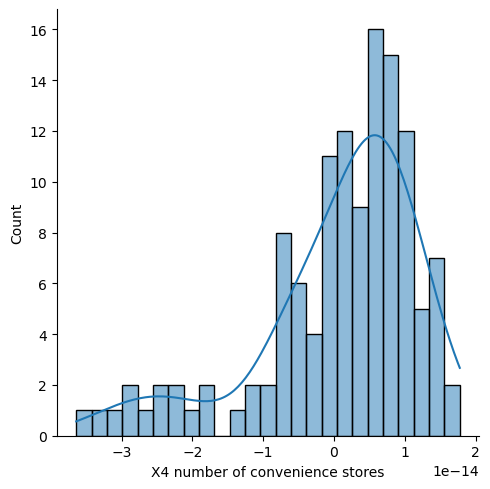

In [24]:
sns.displot(test_residual, bins=25, kde=True)


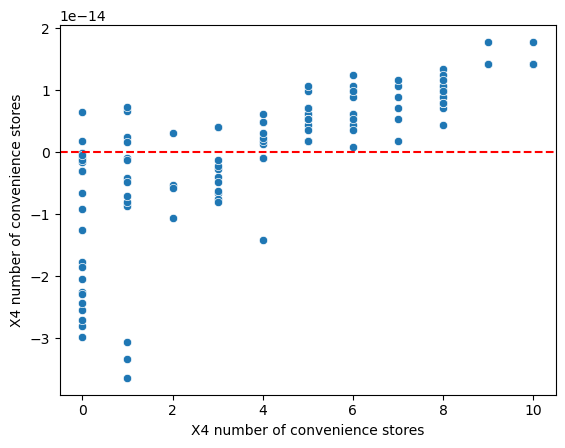

In [25]:
sns.scatterplot(x=y_test, y=test_residual)

plt.axhline(y=0, color='r', ls='--')

# Thanks to veiw